In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle

In [2]:
data = pd.read_csv("../01. Data Preprocessing/data/standard_data.csv")

In [3]:
data

,raw_comment,standard_comment,label
0,"Lần đầu mua tại shop nhưng rất ưng ý, vải mặc ...",lần đầu tại vải mát lót đùi thun sớm mỗi sản b...,1
1,"Giao hàng nhanh, shop xịn xò đặt hàng xong là ...",nhanh xong chủ_động nhắn_tin xác_nhận gói mỗi ...,1
2,"Size vừa vặn luôn, shop mall mà hàng chất lượn...",vầy tội mu hả các bác giá_rẻ chất_lượng vừa_vặn,1
3,Sản phẩm chất lượng.đóng gói kĩ.shop nhiệt tìn...,kĩ nhiệt_tình lần cảm_ơn ủng_hộ đóng_gói chất_...,1
4,Chất lượng sản phẩm tuyệt vời giao hàng nhanh ...,nhanh dài_dài giao_hàng_nhanh ủng_hộ tuyệt_vời...,1
...,...,...,...
219591,Nơ xinh đúng chất công chúa đẹpppppp,nơ xinh đúng chất công_chúa đẹp,1
219592,"Rất dễ thương, đẹp",đẹp dễ_thương,1
219593,Đẹp lắm lun mọi ngừ ơi . Hdhhechhjhshxhdhhxhxh...,đẹp mọi ơi học mọi_người đẹp_lắm_luôn,1
219594,Mua 12 món giao đủ. Vừa rẻ vừa chất lượng rất ...,món đủ vừa rẻ vừa thích tiếp ủng_hộ chất_lượng...,1


In [4]:
data = shuffle(data)

In [5]:
data

,raw_comment,standard_comment,label
65980,Vải cũng ok ko mềm mịn với mát cho lắm. So với...,vải mềm mịn mát so rẻ hình in đẹp giá_tiền,1
25289,Vải đẹp áo đẹp mà mỗi tội tui ham hôd đặt áo 3...,vải đẹp đẹp mỗi tội ham thành váy thui áo_đẹp,1
86763,"Chất lượng rất rất oke luôn, giặt cũng k bị ra...",giặt mùi thơm đáng nhà chất_lượng rất_đáng mua...,1
217145,Giao thiếu 1 đôi,thiếu đôi giao_thiếu,-1
96516,"Áo vải đẹp, không chê vào đâu được. Shop giao ...",vải đẹp chê cực nhanh lần giao_hàng ủng_hộ,1
...,...,...,...
88569,Đây là lần thứ 2 mình mua áo của shop. Áo hơi ...,đây lần thứ mang đẹp mang đá bóng cảm_ơn nhiều...,1
214144,"Túi đẹp, rất chắc chắn. Giá rẻ nữa, nên mua. Q...",túi đẹp chắc_chắn quai đeo may kích_cỡ phù_hợp...,1
153945,Hàng chất lượng \nGiống trong hình\nChất vải o...,giống trong hình nước_ngoài chất_vải hơi_lâu c...,1
174381,Cái màu vàng hơi bị xước tí \nNói chung chất l...,vàng hơi xước tí phù_hợp lấy loại bé cặp_tóc m...,1


In [6]:
tmp = data[['label', 'standard_comment']].groupby(['label']).count()

In [7]:
tmp

,standard_comment
label,
-1,3458
0,11845
1,204293


In [8]:
tmp = tmp['standard_comment'].to_list()

In [9]:
negative = data.label[data.label.eq(-1)].sample(tmp[0]).index
normal = data.label[data.label.eq(0)].sample(tmp[1]).index
positive = data.label[data.label.eq(1)].sample(tmp[1] + tmp[0]*2) .index

final_data = data.loc[negative.union(normal).union(positive)]

In [10]:
final_data

,raw_comment,standard_comment,label
4,Chất lượng sản phẩm tuyệt vời giao hàng nhanh ...,nhanh dài_dài giao_hàng_nhanh ủng_hộ tuyệt_vời...,1
12,Shop giao hàng nhanh chóng. Sản phẩm sử dụng ...,nhanh_chóng sử_dụng tốt giao_hàng_nhanh ủng_hộ...,1
19,giao hàng nhanh chóng đóng gói cẩn thận chất l...,nhanh_chóng giao_hàng_nhanh cẩn_thận đóng_gói ...,1
24,Ok sp đẹp 10 điểm,đẹp điểm sản_phẩm,1
42,Quần lót bên trong không có vải miếng vải cott...,lót trong vải miếng vải độ lõm đồ,-1
...,...,...,...
219551,Sorry shop vì phản hồi bằng hình ảnh kh liên q...,phản_hồi bằng hình_ảnh liên_quan váy cực xinh ...,1
219574,Sản phẩm bị lỗi ở nút váy.,lỗi nút váy sản_phẩm,0
219575,Shop giao không đúng với mẫu,đúng mẫu không_đúng,-1
219580,K như mong muốn chỉ thừa nhiều vãi xoăn,mong_muốn thừa nhiều vải xoăn chỉ_thừa,0


In [11]:
final_data = final_data.reset_index(drop=True)

In [12]:
final_data

,raw_comment,standard_comment,label
0,Chất lượng sản phẩm tuyệt vời giao hàng nhanh ...,nhanh dài_dài giao_hàng_nhanh ủng_hộ tuyệt_vời...,1
1,Shop giao hàng nhanh chóng. Sản phẩm sử dụng ...,nhanh_chóng sử_dụng tốt giao_hàng_nhanh ủng_hộ...,1
2,giao hàng nhanh chóng đóng gói cẩn thận chất l...,nhanh_chóng giao_hàng_nhanh cẩn_thận đóng_gói ...,1
3,Ok sp đẹp 10 điểm,đẹp điểm sản_phẩm,1
4,Quần lót bên trong không có vải miếng vải cott...,lót trong vải miếng vải độ lõm đồ,-1
...,...,...,...
34059,Sorry shop vì phản hồi bằng hình ảnh kh liên q...,phản_hồi bằng hình_ảnh liên_quan váy cực xinh ...,1
34060,Sản phẩm bị lỗi ở nút váy.,lỗi nút váy sản_phẩm,0
34061,Shop giao không đúng với mẫu,đúng mẫu không_đúng,-1
34062,K như mong muốn chỉ thừa nhiều vãi xoăn,mong_muốn thừa nhiều vải xoăn chỉ_thừa,0


🚩 Thực hiện tfidf

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
# tf_idf = TfidfVectorizer(min_df=10, max_df=0.8, max_features=5000, sublinear_tf=True)
tf_idf = TfidfVectorizer()
tf_idf.fit(final_data['standard_comment'])
X = tf_idf.transform(final_data['standard_comment'])

In [15]:
X.shape

(34064, 7458)

In [16]:
y = final_data['label']

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, shuffle=True)

In [19]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pre = model.predict(X_test)

/home/manhcuong/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

          -1       0.64      0.34      0.44       733
           0       0.64      0.67      0.66      2392
           1       0.81      0.86      0.84      3688

    accuracy                           0.74      6813
   macro avg       0.70      0.62      0.64      6813
weighted avg       0.73      0.74      0.73      6813



<hr>

🚩 Over-sampling

In [21]:
from imblearn.over_sampling import RandomOverSampler

In [22]:
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)

In [23]:
X_ros.shape

(56283, 7458)

In [24]:
from collections import Counter

In [25]:
print(Counter(y_ros))

Counter({1: 18761, -1: 18761, 0: 18761})


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.2, random_state=10, shuffle=True)

In [27]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pre = model.predict(X_test)

/home/manhcuong/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

          -1       0.78      0.86      0.82      3724
           0       0.68      0.64      0.66      3749
           1       0.82      0.79      0.80      3784

    accuracy                           0.76     11257
   macro avg       0.76      0.76      0.76     11257
weighted avg       0.76      0.76      0.76     11257



In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
cm = confusion_matrix(y_test,y_pre)

In [31]:
cm

array([[3188,  462,   74],
       [ 764, 2396,  589],
       [ 147,  646, 2991]])

# -1

In [32]:
group_neg = final_data[final_data['label'] == -1]['standard_comment']

In [33]:
tmp_neg = " ".join(group_neg.to_list())

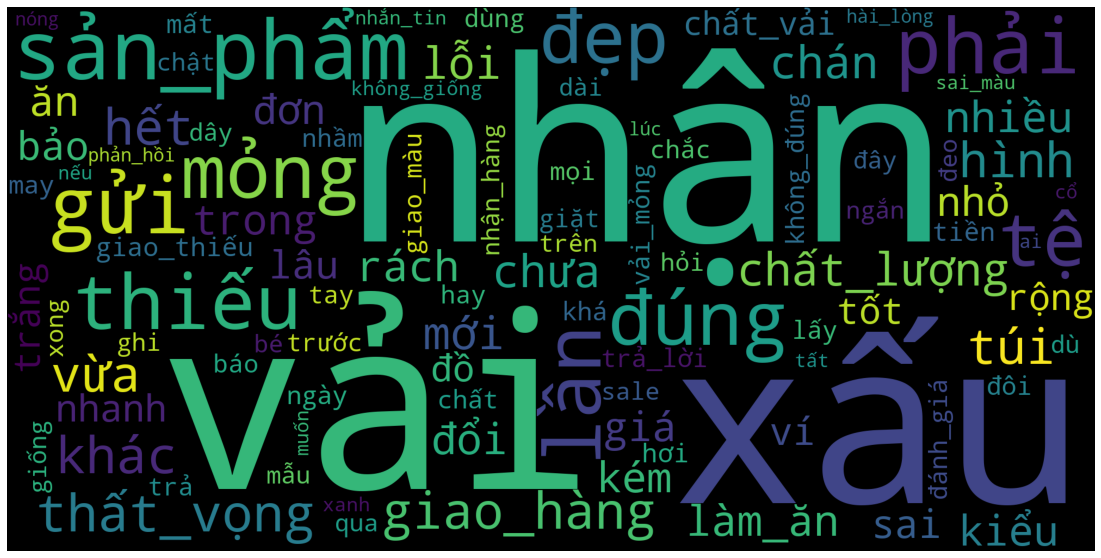

In [34]:
import wordcloud
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,10))
word_cloud = wordcloud.WordCloud(max_words=100,background_color ="black",
                               width=2000,height=1000,mode="RGB").generate(str(tmp_neg))
plt.axis("off")
plt.imshow(word_cloud)

# 0

In [35]:
group_neu = final_data[final_data['label'] == 0]['standard_comment']

In [36]:
tmp_neu = " ".join(group_neu.to_list())

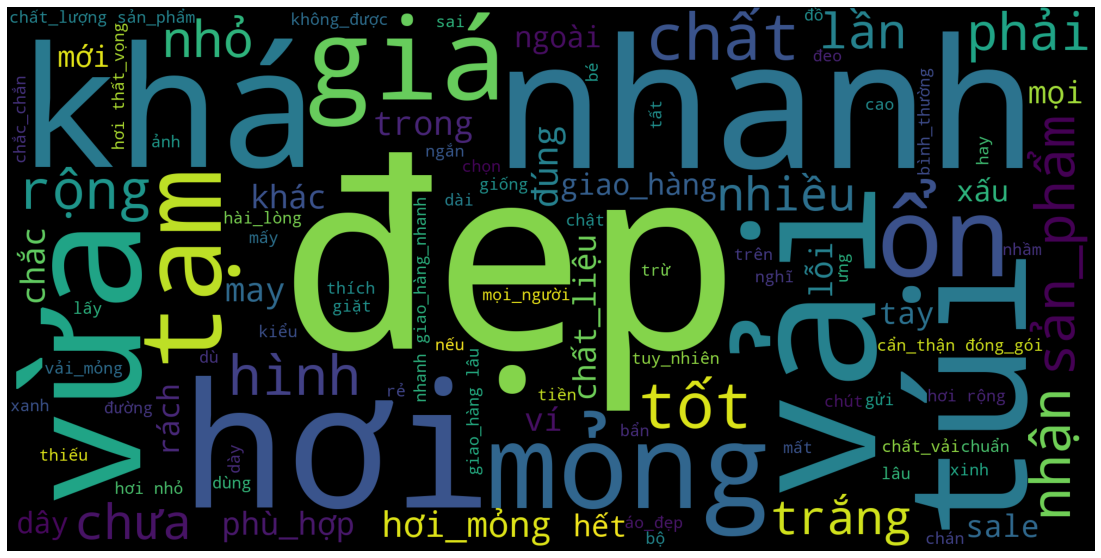

In [37]:
plt.figure(figsize=(20,10))
word_cloud = wordcloud.WordCloud(max_words=100,background_color ="black",
                               width=2000,height=1000,mode="RGB").generate(str(tmp_neu))
plt.axis("off")
plt.imshow(word_cloud)

# 1

In [38]:
group_pos = final_data[final_data['label'] == 1]['standard_comment']

In [39]:
tmp_pos = " ".join(group_pos.to_list())

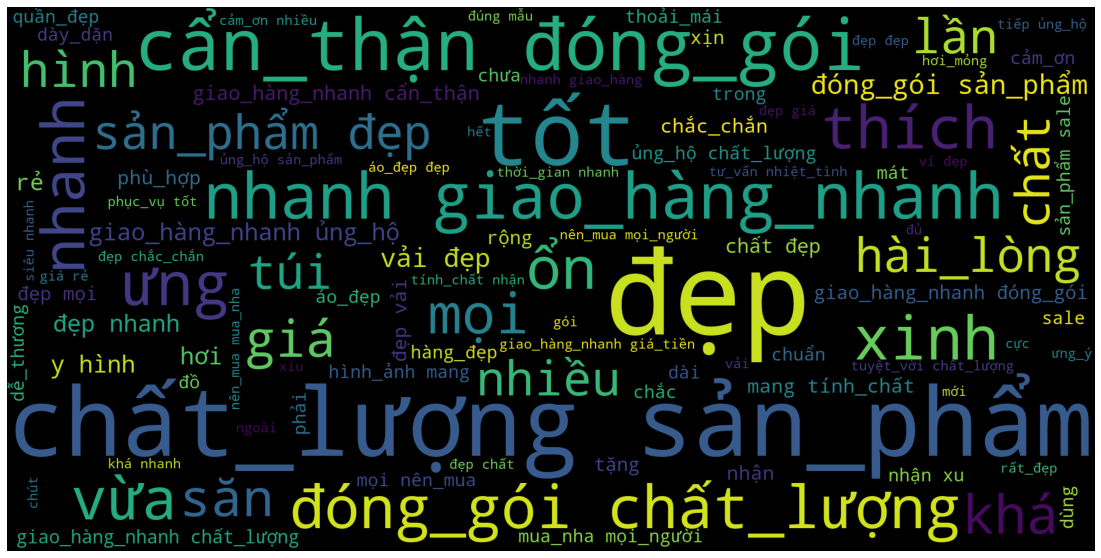

In [40]:
plt.figure(figsize=(20,10))
word_cloud = wordcloud.WordCloud(max_words=100,background_color ="black",
                               width=2000,height=1000,mode="RGB").generate(str(tmp_pos))
plt.axis("off")
plt.imshow(word_cloud)